In [2]:
# https://drive.google.com/file/d/1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN/view?usp=sharing
!gdown 1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN

Downloading...
From: https://drive.google.com/uc?id=1R9NVDw65fPfv4S9VtV932yjtu8SeqBVN
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 64.0MB/s]


In [3]:
import pandas as pd

# 1. Load and prepare data
DATASET_PATH = '/content/Twitter_Data.csv'
df = pd.read_csv(DATASET_PATH)
dataset_arr = df.to_numpy()

print(df.tail(5))
print('dataset_arr', dataset_arr[-5:,])
#
print(df.info())


                                               clean_text  category
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0
dataset_arr [['why these 456 crores paid neerav modi not recovered from congress leaders this hard earned money tax payers '
  -1.0]
 ['dear rss terrorist payal gawar what about modi killing 1000 plus muslims listen dysfunctional little pest take your pea size brain bleat somewhere else anyone who commits crime criminal irrespective hindumuslim stop giving criminals religious twist'
  -1.0]
 ['did you cover her interaction forum where she left ' 0.0]
 ['there big project came into india modi dream project but not happened reality'
  0.0]
 ['have you ever listen about like gurukul where

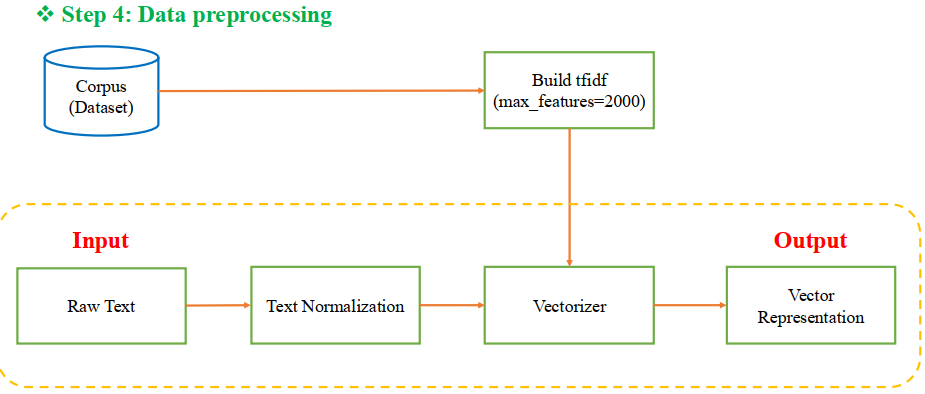

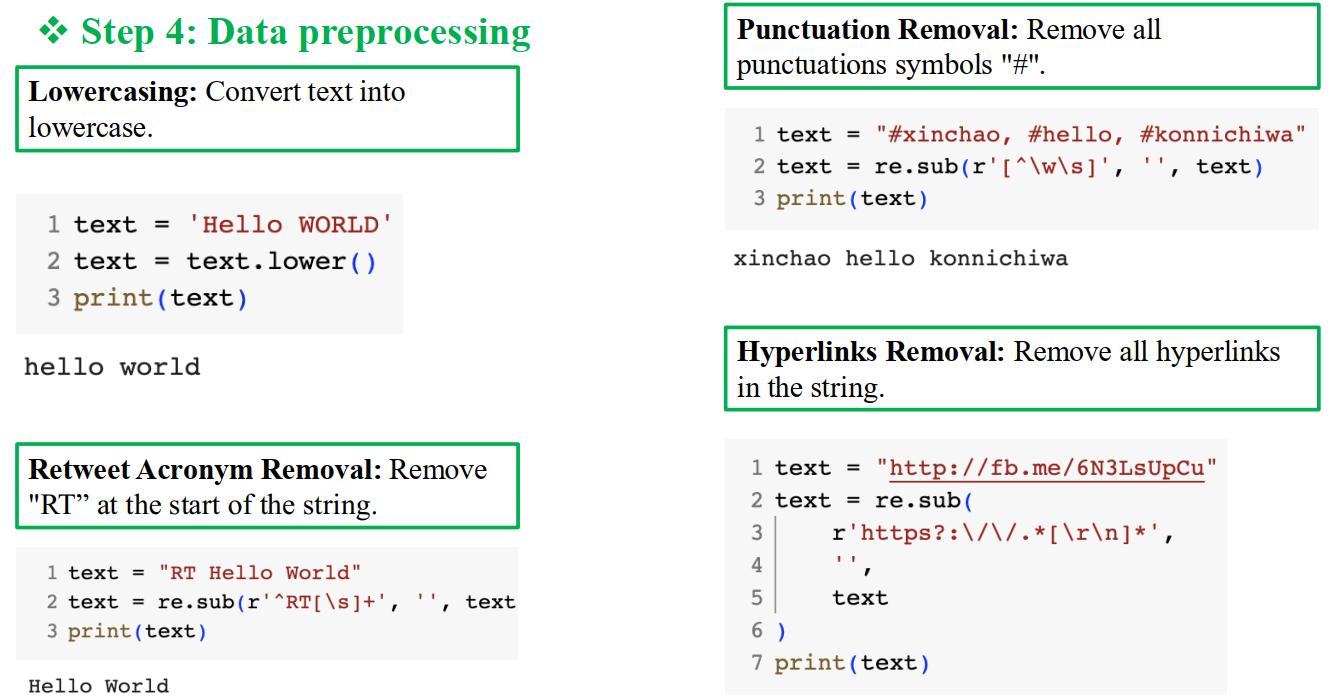

In [4]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

nltk.download('stopwords')

# Step 1: Load and clean dataset
df = df.dropna()  # Xóa các hàng có giá trị null

# Step 2: Text normalization
def text_normalize(text: str) -> str:
    """
    Chuẩn hóa văn bản: chuyển chữ thường, loại bỏ stop words, ký hiệu, và stemming.
    Input:
        text: str - Văn bản cần chuẩn hóa. Ví dụ: "I love this movie!"
    Output:
        normalized_text: str - Văn bản đã chuẩn hóa. Ví dụ: "love movi"

    Example:
        >>> text = "I love this movie!"
        >>> normalized_text = text_normalize(text)
        >>> print(normalized_text)  # Output: "love movi"
    """
    # Chuyển thành chữ thường
    text = text.lower()

    # Loại bỏ ký hiệu và từ viết tắt RT
    text = re.sub(r'^rt[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Loại bỏ stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]  # singing -> sing; shared ->share;...
    normalized_text = ' '.join(words)

    return normalized_text

text_normalize  = text_normalize(""" text = "I love this movie!"
    >>> normalized_text = text_normalize(text)
    >>> print(normalized_text)  # Output: "love movi" """)
text_normalize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'text love movi normalized_text text_normalizetext printnormalized_text output love movi'

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Class Distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64
Epoch 10/100:
Train Loss: 0.6132, Train Acc: 79.02%
Val Loss: 0.6491, Val Acc: 78.31%
Test Loss: 0.6556, Test Acc: 77.62%
--------------------------------------------------
Epoch 20/100:
Train Loss: 0.6127, Train Acc: 78.96%
Val Loss: 0.6512, Val Acc: 78.43%
Test Loss: 0.6552, Test Acc: 77.74%
--------------------------------------------------
Epoch 30/100:
Train Loss: 0.6122, Train Acc: 79.16%
Val Loss: 0.6520, Val Acc: 78.24%
Test Loss: 0.6529, Test Acc: 77.99%
--------------------------------------------------
Epoch 40/100:
Train Loss: 0

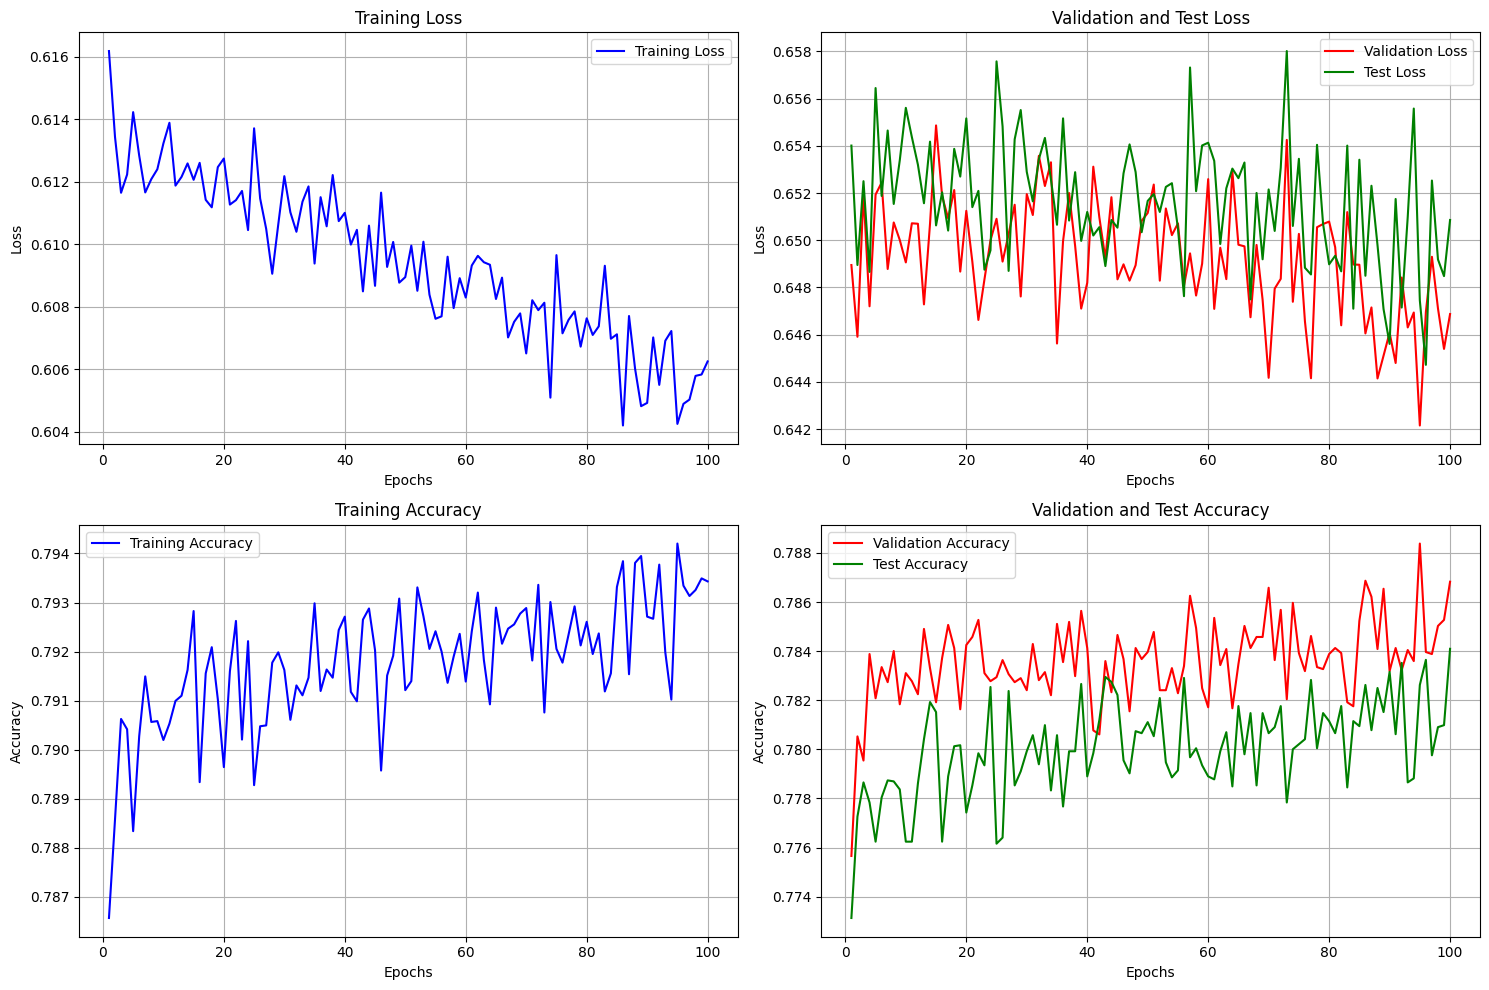

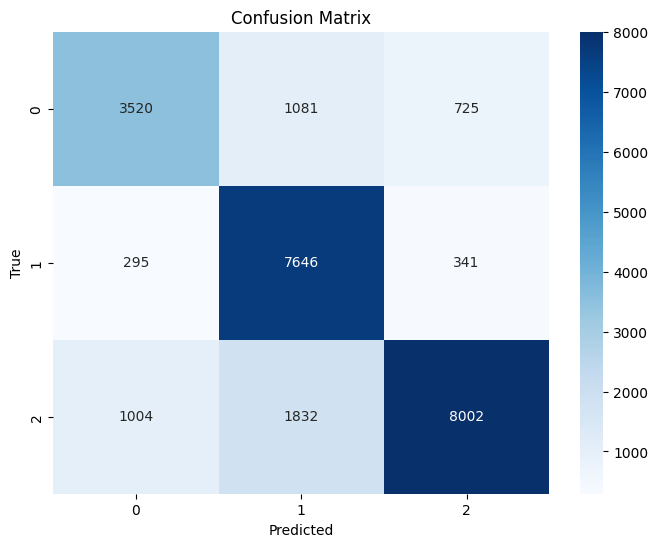


Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.66      0.69      5326
     Neutral       0.72      0.92      0.81      8282
    Positive       0.88      0.74      0.80     10838

    accuracy                           0.78     24446
   macro avg       0.78      0.77      0.77     24446
weighted avg       0.80      0.78      0.78     24446



In [7]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# NLTK for text processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

class SoftmaxRegression:
    """
    Softmax Regression cho phân tích sentiment Twitter với 3 classes (-1, 0, 1).

    Attributes:
        theta: np.ndarray
            Ma trận trọng số của model
        n_features: int
            Số lượng đặc trưng đầu vào
        n_classes: int
            Số lượng classes (3 trong trường hợp này)
        history: Dict
            Lịch sử training (loss và accuracy cho train/val/test)

    Example:
        >>> model = SoftmaxRegression()
        >>> model.fit(X_train, y_train, X_val, y_val)
        >>> y_pred = model.predict(X_test)
    """

    def __init__(self):
        self.theta = None
        self.n_features = None
        self.n_classes = None
        self.history = {
            'train_loss': [], 'val_loss': [], 'test_loss': [],
            'train_acc': [], 'val_acc': [], 'test_acc': []
        }

    def softmax(self, z: np.ndarray) -> np.ndarray:
        """
        Tính softmax với numerical stability.

        Input:
            z: np.ndarray - Matrix logits shape (n_samples, n_classes)

        Output:
            np.ndarray - Matrix probabilities shape (n_samples, n_classes)
        """
        shifted_z = z - np.max(z, axis=1, keepdims=True) # shifted_z = (trừ)từng phần tử trong hàng '-' giá trị lớn nhất trong mỗi hàng của 𝑧.
        exp_z = np.exp(shifted_z)                        # tránh giá trị quá lớn khi tính lũy thừa e^mũ -> max của shifted_z là 0, như trên.
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Tính cross-entropy loss.

        Input:
            X: np.ndarray - Features matrix shape (n_samples, n_features)
            y: np.ndarray - One-hot labels shape (n_samples, n_classes)

        Output:
            float - Giá trị loss trung bình
        """
        y_pred = self.softmax(np.dot(X, self.theta))
        return -np.mean(np.sum(y * np.log(y_pred + 1e-15), axis=1))

    def compute_accuracy(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Tính accuracy.

        Input:
            X: np.ndarray - Features matrix
            y: np.ndarray - One-hot labels

        Output:
            float - Accuracy score (0-1)
        """
        y_pred = self.predict(X)
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))

    def fit(self, X_train: np.ndarray, y_train: np.ndarray,
            X_val: np.ndarray, y_val: np.ndarray,
            X_test: np.ndarray = None, y_test: np.ndarray = None,
            learning_rate: float = 0.01,
            epochs: int = 100,
            batch_size: int = 32,
            verbose: bool = True) -> 'SoftmaxRegression':
        """
        Train model với mini-batch gradient descent.

        Input:
            X_train, y_train: Training data và labels
            X_val, y_val: Validation data và labels
            X_test, y_test: Test data và labels (optional)
            learning_rate: Learning rate cho gradient descent
            epochs: Số lượng epochs
            batch_size: Kích thước batch
            verbose: Whether to print progress

        Output:
            self: Trained model instance
        """
        self.n_features = X_train.shape[1]
        self.n_classes = y_train.shape[1]
        self.theta = np.random.randn(self.n_features, self.n_classes) * 0.01

        n_samples = X_train.shape[0]
        n_batches = int(np.ceil(n_samples / batch_size))

        for epoch in range(epochs):
            # Shuffle training data
            indices = np.random.permutation(n_samples)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]

            # Mini-batch training
            for i in range(n_batches):
                start_idx = i * batch_size
                end_idx = min(start_idx + batch_size, n_samples)

                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]

                # Compute gradients and update weights
                y_pred = self.softmax(np.dot(X_batch, self.theta))
                grad = np.dot(X_batch.T, (y_pred - y_batch)) / len(X_batch)
                self.theta -= learning_rate * grad

            # Compute and store metrics
            metrics = self._compute_epoch_metrics(
                X_train, y_train, X_val, y_val, X_test, y_test)

            for metric_name, value in metrics.items():
                self.history[metric_name].append(value)

            # Print progress
            if verbose and (epoch + 1) % 10 == 0:
                self._print_progress(epoch + 1, epochs, metrics)

        return self

    def _compute_epoch_metrics(self, X_train, y_train, X_val, y_val,
                             X_test=None, y_test=None) -> Dict[str, float]:
        """
        Compute metrics for current epoch.
        """
        metrics = {
            'train_loss': self.compute_loss(X_train, y_train),
            'train_acc': self.compute_accuracy(X_train, y_train),
            'val_loss': self.compute_loss(X_val, y_val),
            'val_acc': self.compute_accuracy(X_val, y_val)
        }

        if X_test is not None and y_test is not None:
            metrics.update({
                'test_loss': self.compute_loss(X_test, y_test),
                'test_acc': self.compute_accuracy(X_test, y_test)
            })

        return metrics

    def _print_progress(self, epoch: int, total_epochs: int, metrics: Dict[str, float]):
        """
        Print training progress.
        """
        print(f'Epoch {epoch}/{total_epochs}:')
        print(f'Train Loss: {metrics["train_loss"]:.4f}, Train Acc: {metrics["train_acc"]:.2%}')
        print(f'Val Loss: {metrics["val_loss"]:.4f}, Val Acc: {metrics["val_acc"]:.2%}')
        if 'test_loss' in metrics:
            print(f'Test Loss: {metrics["test_loss"]:.4f}, Test Acc: {metrics["test_acc"]:.2%}')
        print('-' * 50)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict probabilities for input features.
        """
        return self.softmax(np.dot(X, self.theta))

    def plot_training_history_old(self):
        """
        Plot training history (loss and accuracy curves).
        """
        epochs = range(1, len(self.history['train_loss']) + 1)

        plt.figure(figsize=(15, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        plt.plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        if self.history['test_loss']:
            plt.plot(epochs, self.history['test_loss'], 'g-', label='Test Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.history['train_acc'], 'b-', label='Training Accuracy')
        plt.plot(epochs, self.history['val_acc'], 'r-', label='Validation Accuracy')
        if self.history['test_acc']:
            plt.plot(epochs, self.history['test_acc'], 'g-', label='Test Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_training_history(self):
        """
        Plot training history (loss and accuracy curves) using a 2x2 grid.
        """
        epochs = range(1, len(self.history['train_loss']) + 1)

        # Create a 2x2 grid of subplots
        fig, ax = plt.subplots(2, 2, figsize=(15, 10))

        # Plot Training Loss in subplot (0, 0)
        ax[0, 0].plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        ax[0, 0].set_title('Training Loss')
        ax[0, 0].set_xlabel('Epochs')
        ax[0, 0].set_ylabel('Loss')
        ax[0, 0].legend()
        ax[0, 0].grid(True)

        # Plot Validation and Test Loss in subplot (0, 1)
        ax[0, 1].plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        if 'test_loss' in self.history and self.history['test_loss']:
            ax[0, 1].plot(epochs, self.history['test_loss'], 'g-', label='Test Loss')
        ax[0, 1].set_title('Validation and Test Loss')
        ax[0, 1].set_xlabel('Epochs')
        ax[0, 1].set_ylabel('Loss')
        ax[0, 1].legend()
        ax[0, 1].grid(True)

        # Plot Training Accuracy in subplot (1, 0)
        ax[1, 0].plot(epochs, self.history['train_acc'], 'b-', label='Training Accuracy')
        ax[1, 0].set_title('Training Accuracy')
        ax[1, 0].set_xlabel('Epochs')
        ax[1, 0].set_ylabel('Accuracy')
        ax[1, 0].legend()
        ax[1, 0].grid(True)

        # Plot Validation and Test Accuracy in subplot (1, 1)
        ax[1, 1].plot(epochs, self.history['val_acc'], 'r-', label='Validation Accuracy')
        if 'test_acc' in self.history and self.history['test_acc']:
            ax[1, 1].plot(epochs, self.history['test_acc'], 'g-', label='Test Accuracy')
        ax[1, 1].set_title('Validation and Test Accuracy')
        ax[1, 1].set_xlabel('Epochs')
        ax[1, 1].set_ylabel('Accuracy')
        ax[1, 1].legend()
        ax[1, 1].grid(True)

        # Adjust layout
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, X_test: np.ndarray, y_test: np.ndarray):
        """
        Plot confusion matrix for test predictions.
        """
        y_pred = self.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_test, axis=1)

        cm = confusion_matrix(y_true_classes, y_pred_classes)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_true_classes, y_pred_classes,
                                 target_names=['Negative', 'Neutral', 'Positive']))

def prepare_data(df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray,
                                            np.ndarray, np.ndarray, np.ndarray]:
    """
    Prepare data for Softmax Regression.
    """
    # Loại bỏ các hàng có giá trị NaN trong cột 'clean_text' hoặc 'category'
    df = df.dropna(subset=['clean_text', 'category']).reset_index(drop=True)

    # Create TF-IDF features , TfidfVectorizer của scikit-learn đều có thể nhận giá trị tuyệt đối hoặc giá trị phần trăm
    vectorizer = TfidfVectorizer(
        max_features=2000,
        min_df=3,     # loại bỏ các từ xuất hiện ít hơn 5 lần (giá trị nguyên:  min_df và max_df sẽ là số lượng tài liệu tối thiểu và tối đa)
        max_df=0.95,  # loại bỏ các từ xuất hiện nhiều hơn 95%(giá trị thập phân (float) trong khoảng [0.0, 1.0] ->sẽ được hiểu là phần trăm tài liệu)
        ngram_range=(1, 2),
        stop_words='english'
    )

    X = vectorizer.fit_transform(df['clean_text']).toarray()

    # Convert labels and create one-hot encoding
    y = df['category'].map({-1.0: 0, 0.0: 1, 1.0: 2}).values
    y = pd.get_dummies(y).values

    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test

if __name__ == "__main__":
    # Load data
    DATASET_PATH = '/content/Twitter_Data.csv'
    df = pd.read_csv(DATASET_PATH)

    # Print dataset info
    print("Dataset Information:")
    print(df.info())
    print("\nClass Distribution:")
    print(df['category'].value_counts())

    # Prepare data
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df)

    # Initialize and train model
    model = SoftmaxRegression()
    model.fit(X_train, y_train, X_val, y_val, X_test, y_test,
             learning_rate=0.01, epochs=100, batch_size=32)

    # Plot training history
    model.plot_training_history()

    # Plot confusion matrix and print classification report
    model.plot_confusion_matrix(X_test, y_test)

In [ ]:
# Bước xử lý: Xử lý các giá trị âm trong cột 'category' để chuyển thành các nhãn hợp lệ cho bài toán phân loại
# Giả sử các giá trị là: -1.0 cho "tiêu cực", 0 cho "trung tính" và 1 cho "tích cực"
# Chúng ta sẽ ánh xạ lại các giá trị này
df['category'] = df['category'].map({-1.0: 0, 0.0: 1, 1.0: 2})

# Kiểm tra lại cột nhãn sau khi chuyển đổi
print(df['category'].unique())  # Nên ra các giá trị 0, 1, 2 nếu có đủ các loại cảm xúc

# Loại bỏ các hàng null nếu có sau khi chuyển đổi
df = df.dropna(subset=['clean_text', 'category'])
df

[ 1.  2. nan]


,clean_text,category
0,when modi promised “minimum government maximum...,1.0
1,talk all the nonsense and continue all the dra...,2.0
5,kiya tho refresh maarkefir comment karo,2.0
6,surat women perform yagna seeks divine grace f...,2.0
7,this comes from cabinet which has scholars lik...,2.0
...,...,...
162974,save your agenda peddling ’ had with terror at...,2.0
162975,why these 456 crores paid neerav modi not reco...,1.0
162976,dear rss terrorist payal gawar what about modi...,1.0
162977,did you cover her interaction forum where she ...,2.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo vectorizer với số đặc trưng tối đa là 2000
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['category'].values  # Nhãn sau khi chuyển đổi thành các giá trị 0, 1, 2

X, y

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.25237192, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([1., 2., 2., ..., 1., 2., 2.]))

In [ ]:
import numpy as np

def one_hot_encode_labels(y):
    n_classes = np.max(y) + 1  # 3 lớp: 0, 1, 2
    y_encoded = np.zeros((len(y), n_classes))
    y_encoded[np.arange(len(y)), y] = 1
    return y_encoded

y_encoded = one_hot_encode_labels(y)

TypeError: 'numpy.float64' object cannot be interpreted as an integer